In [162]:
import scipy
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas.plotting import scatter_matrix
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.utils import resample
%matplotlib inline

In [2]:
# Read and import data
raw_data = pd.read_csv('ESSdata_Thinkful.csv', encoding='latin-1')
raw_data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
#Identify all the columns in the file
raw_data.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

In [4]:
#Add a column that joins country and year
raw_data['cntry_year'] = raw_data.apply(lambda row: str(row.cntry) + '_' + str(row.year), axis=1)

In [5]:
#Analyse types of variables
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 14 columns):
cntry         8594 non-null object
idno          8594 non-null float64
year          8594 non-null int64
tvtot         8586 non-null float64
ppltrst       8580 non-null float64
pplfair       8555 non-null float64
pplhlp        8569 non-null float64
happy         8563 non-null float64
sclmeet       8579 non-null float64
sclact        8500 non-null float64
gndr          8584 non-null float64
agea          8355 non-null float64
partner       8577 non-null float64
cntry_year    8594 non-null object
dtypes: float64(11), int64(1), object(2)
memory usage: 940.0+ KB


In [6]:
#Number of different countries in the dataset
raw_data.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

#### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample. ####

In [8]:
#Get info of the dataset once reduced to the trust variable
#Slice the dataframe to the people trust variable
ppltrust = raw_data[['cntry','cntry_year','ppltrst']]

#Info
ppltrust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 3 columns):
cntry         8594 non-null object
cntry_year    8594 non-null object
ppltrst       8580 non-null float64
dtypes: float64(1), object(2)
memory usage: 201.5+ KB


In [9]:
#Clean the values in the dataframe that are null
ppltrust_clean = ppltrust[ppltrust.ppltrst.notnull()]

#Check the remaining values
ppltrust_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8580 entries, 0 to 8593
Data columns (total 3 columns):
cntry         8580 non-null object
cntry_year    8580 non-null object
ppltrst       8580 non-null float64
dtypes: float64(1), object(2)
memory usage: 268.1+ KB


In [10]:
#Check the sizes of data by country
ppltrust_clean.groupby('cntry_year').size()

cntry_year
CH_6     773
CH_7     773
CZ_6     651
CZ_7     657
DE_6      14
DE_7      14
ES_6    1213
ES_7    1211
NO_6     730
NO_7     730
SE_6     906
SE_7     908
dtype: int64

cntry_year
CH_6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
CH_7    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
CZ_6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
CZ_7    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
DE_6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
DE_7    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
ES_6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
ES_7    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
NO_6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
NO_7    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
SE_6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
SE_7    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

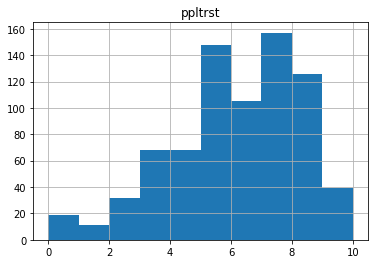

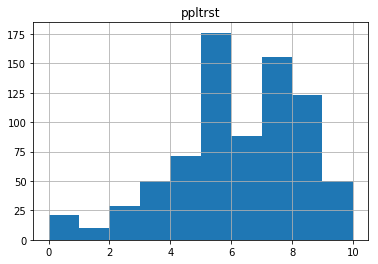

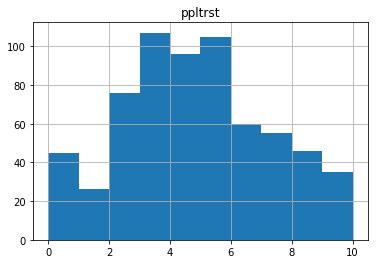

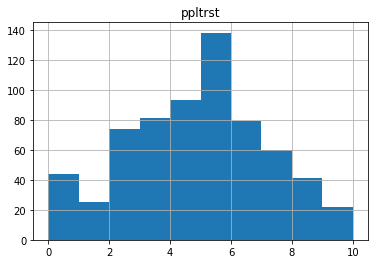

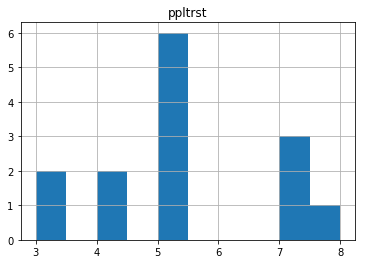

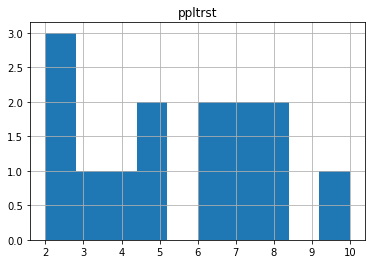

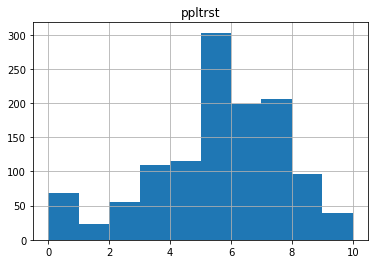

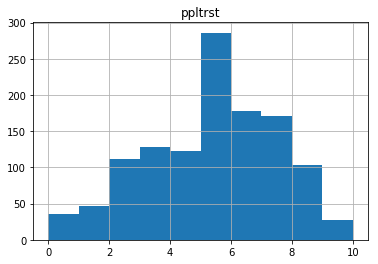

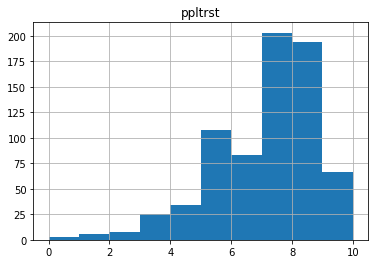

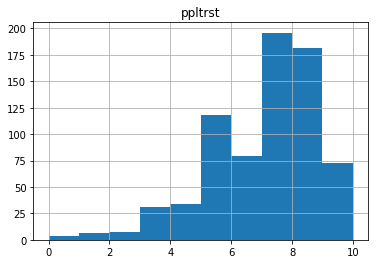

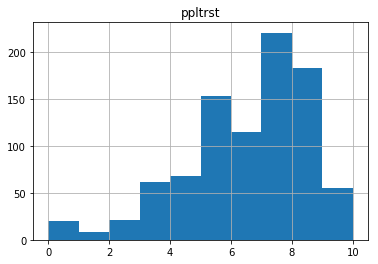

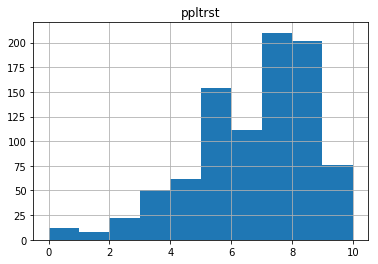

In [11]:
#Print the dataset for visual inspection
ppltrust_clean.groupby('cntry_year').hist(sharey=True,sharex=True)

All countries except for Denmark seem to follow a normal distribution

In [58]:
#Build the lists for each country each year
T_CH_6 = ppltrust_clean[ppltrust_clean.cntry_year == 'CH_6']['ppltrst'].tolist()
T_CH_7 = ppltrust_clean[ppltrust_clean.cntry_year == 'CH_7']['ppltrst'].tolist()
T_CZ_6 = ppltrust_clean[ppltrust_clean.cntry_year == 'CZ_6']['ppltrst'].tolist()
T_CZ_7 = ppltrust_clean[ppltrust_clean.cntry_year == 'CZ_7']['ppltrst'].tolist()
T_DE_6 = ppltrust_clean[ppltrust_clean.cntry_year == 'DE_6']['ppltrst'].tolist()
T_DE_7 = ppltrust_clean[ppltrust_clean.cntry_year == 'DE_7']['ppltrst'].tolist()
T_ES_6 = ppltrust_clean[ppltrust_clean.cntry_year == 'ES_6']['ppltrst'].tolist()
T_ES_7 = ppltrust_clean[ppltrust_clean.cntry_year == 'ES_7']['ppltrst'].tolist()
T_NO_6 = ppltrust_clean[ppltrust_clean.cntry_year == 'NO_6']['ppltrst'].tolist()
T_NO_7 = ppltrust_clean[ppltrust_clean.cntry_year == 'NO_7']['ppltrst'].tolist()
T_SE_6 = ppltrust_clean[ppltrust_clean.cntry_year == 'SE_6']['ppltrst'].tolist()
T_SE_7 = ppltrust_clean[ppltrust_clean.cntry_year == 'SE_7']['ppltrst'].tolist()

#Build the arrays for comparison
trust = np.asarray(T_CH_6 + T_CH_7+
                   T_CZ_6 + T_CZ_7+
                   T_DE_6 + T_DE_7+
                   T_ES_6 + T_ES_7+
                   T_NO_6 + T_NO_7+
                   T_SE_6 + T_SE_7)

group = np.array(['T_CH_6','T_CH_7', 
                  'T_CZ_6','T_CZ_7',
                  'T_DE_6','T_DE_7',
                  'T_ES_6','T_ES_7',
                  'T_NO_6','T_NO_7',
                  'T_SE_6','T_SE_7'])

group = np.repeat(group, len(trust)/12)

#Run the pairwise t-test using tukey hsd
tukey = pairwise_tukeyhsd(endog=trust,    # Data
                          groups=group,   # Groups
                          alpha=0.05)     # Significance level

#Summarize the data
tukey.summary()

group1,group2,meandiff,lower,upper,reject
T_CH_6,T_CH_7,-0.0266,-0.3948,0.3417,False
T_CH_6,T_CZ_6,-1.0713,-1.4396,-0.7031,True
T_CH_6,T_CZ_7,-1.1888,-1.557,-0.8206,True
T_CH_6,T_DE_6,-0.5958,-0.964,-0.2276,True
T_CH_6,T_DE_7,-0.5958,-0.964,-0.2276,True
T_CH_6,T_ES_6,-0.7804,-1.1487,-0.4122,True
T_CH_6,T_ES_7,0.2783,-0.0899,0.6466,False
T_CH_6,T_NO_6,0.9538,0.5856,1.3221,True
T_CH_6,T_NO_7,0.5245,0.1562,0.8927,True
T_CH_6,T_SE_6,0.4308,0.0625,0.799,True


In this case we have run all the comparisons between countries. We are assuming that all of them follow a normal distribution.

From all the comparisons we are only focusing on those that are within countries between both years.

In the Tukey HSD test the null hypothesis is _that all means being compared are from the same population_.

Only in the cases of ***Spain*** and ***Norway*** the rejection of the null hypothesis is true being the means significantly different and therefore having having populations that are more trusting the case of Spain and less in the case of Norway. The rest of the countries under analysis remain the same.

#### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample ####

In [212]:
#Get info of the dataset once reduced to the trust variable

#Slice the dataframe to the people happiness variable
pplhappy = raw_data[['cntry','cntry_year','happy']]

#Get info about the data
pplhappy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 3 columns):
cntry         8594 non-null object
cntry_year    8594 non-null object
happy         8563 non-null float64
dtypes: float64(1), object(2)
memory usage: 201.5+ KB


In [92]:
#Clean the values in the dataframe that are null
pplhappy_clean = pplhappy[pplhappy.happy.notnull()]

remove_n = 7
drop_indices = np.random.choice(pplhappy_clean.index, remove_n, replace=False)
pplhappy_clean = pplhappy_clean.drop(drop_indices)
#Check the remaining values
pplhappy_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8556 entries, 0 to 8593
Data columns (total 3 columns):
cntry         8556 non-null object
cntry_year    8556 non-null object
happy         8556 non-null float64
dtypes: float64(1), object(2)
memory usage: 267.4+ KB


In [93]:
#Check the sizes of data by country
pplhappy_clean.groupby('cntry_year').size()

cntry_year
CH_6     769
CH_7     772
CZ_6     646
CZ_7     652
DE_6      14
DE_7      14
ES_6    1209
ES_7    1212
NO_6     727
NO_7     730
SE_6     907
SE_7     904
dtype: int64

cntry_year
CH_6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
CH_7    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
CZ_6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
CZ_7    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
DE_6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
DE_7    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
ES_6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
ES_7    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
NO_6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
NO_7    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
SE_6    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
SE_7    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

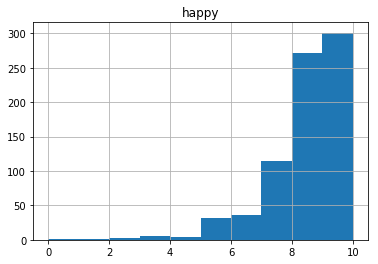

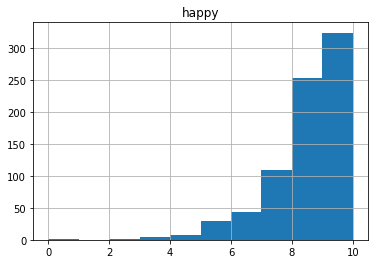

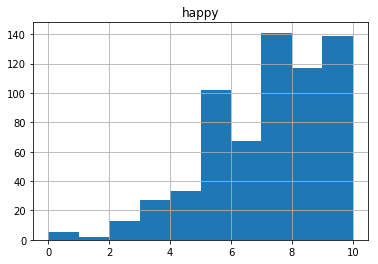

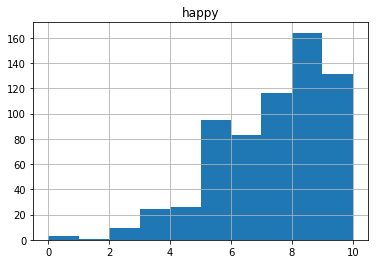

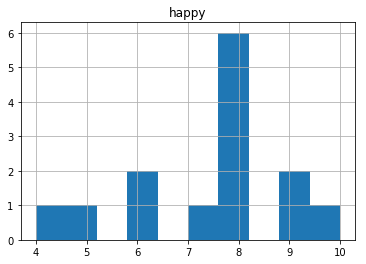

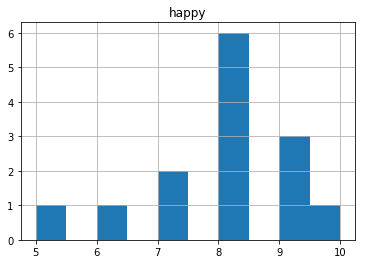

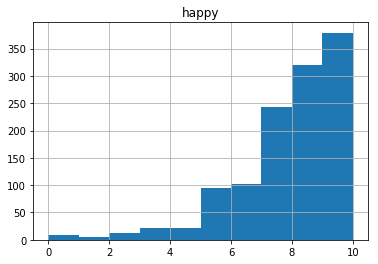

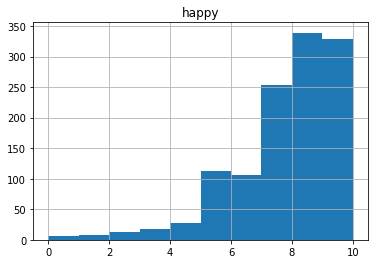

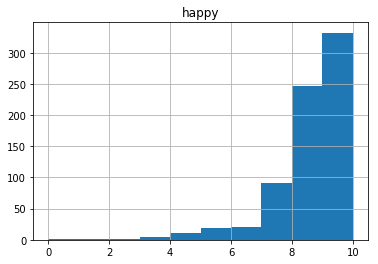

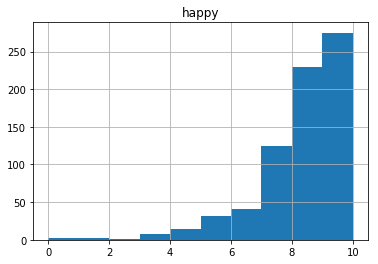

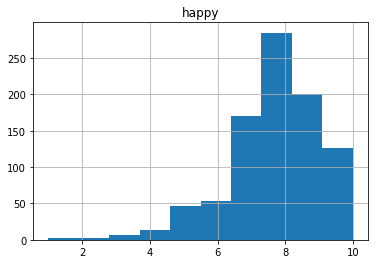

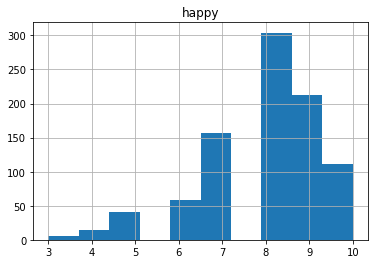

In [94]:
#Plot happy variables for visual inspection per country and year
pplhappy_clean.groupby('cntry_year').hist(sharey=True,sharex=True)

In [97]:
#Build the lists for each country each year
H_CH_6 = pplhappy_clean[pplhappy_clean.cntry_year == 'CH_6']['happy'].tolist()
H_CH_7 = pplhappy_clean[pplhappy_clean.cntry_year == 'CH_7']['happy'].tolist()
H_CZ_6 = pplhappy_clean[pplhappy_clean.cntry_year == 'CZ_6']['happy'].tolist()
H_CZ_7 = pplhappy_clean[pplhappy_clean.cntry_year == 'CZ_7']['happy'].tolist()
H_DE_6 = pplhappy_clean[pplhappy_clean.cntry_year == 'DE_6']['happy'].tolist()
H_DE_7 = pplhappy_clean[pplhappy_clean.cntry_year == 'DE_7']['happy'].tolist()
H_ES_6 = pplhappy_clean[pplhappy_clean.cntry_year == 'ES_6']['happy'].tolist()
H_ES_7 = pplhappy_clean[pplhappy_clean.cntry_year == 'ES_7']['happy'].tolist()
H_NO_6 = pplhappy_clean[pplhappy_clean.cntry_year == 'NO_6']['happy'].tolist()
H_NO_7 = pplhappy_clean[pplhappy_clean.cntry_year == 'NO_7']['happy'].tolist()
H_SE_6 = pplhappy_clean[pplhappy_clean.cntry_year == 'SE_6']['happy'].tolist()
H_SE_7 = pplhappy_clean[pplhappy_clean.cntry_year == 'SE_7']['happy'].tolist()

#Build the arrays for comparison
happy = np.asarray(H_CH_6 + H_CH_7 +
                   H_CZ_6 + H_CZ_7 + 
                   H_DE_6 + H_DE_7 + 
                   H_ES_6 + H_ES_7 + 
                   H_NO_6 + H_NO_7 + 
                   H_SE_6 + H_SE_7)

group_happy = np.array(['H_CH_6', 'H_CH_7',
                     'H_CZ_6', 'H_CZ_7',
                     'H_DE_6', 'H_DE_7',
                     'H_ES_6', 'H_ES_7',
                     'H_NO_6', 'H_NO_7',
                     'H_SE_6', 'H_SE_7'])

group_happy = np.repeat(group_happy, len(happy)/12)

#Run the pairwise t-test using tukey hsd
tukey = pairwise_tukeyhsd(endog=happy,    # Data
                          groups=group_happy,   # Groups
                          alpha=0.05)     # Significance level

#Summarize the data
tukey.summary()

group1,group2,meandiff,lower,upper,reject
H_CH_6,H_CH_7,0.0042,-0.288,0.2964,False
H_CH_6,H_CZ_6,-1.1262,-1.4184,-0.8341,True
H_CH_6,H_CZ_7,-1.1992,-1.4913,-0.907,True
H_CH_6,H_DE_6,-0.5947,-0.8868,-0.3025,True
H_CH_6,H_DE_7,-0.554,-0.8462,-0.2618,True
H_CH_6,H_ES_6,-0.7349,-1.0271,-0.4428,True
H_CH_6,H_ES_7,-0.1893,-0.4815,0.1028,False
H_CH_6,H_NO_6,0.0168,-0.2753,0.309,False
H_CH_6,H_NO_7,-0.1318,-0.424,0.1603,False
H_CH_6,H_SE_6,-0.2581,-0.5502,0.0341,False


In this case we have run all the comparisons between countries. We are assuming that all of them follow a normal distribution.

From all the comparisons we are only focusing on those that are within countries between both years.

In the Tukey HSD test the null hypothesis is that all means being compared are from the same population.

Only in the cases of ***Spain*** the rejection of the null hypothesis is true being the means significantly different and therefore having populations that are happier in recent years. The rest of the countries under analysis remain the same.

#### 3. Who reported watching more TV in 2012, men or women? ####

In [177]:
#Get info of the dataset once reduced to the trust variable
#Slice the dataframe to the people trust variable
tv_total = raw_data[['gndr','year','tvtot']]

#Info
tv_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 3 columns):
gndr     8584 non-null float64
year     8594 non-null int64
tvtot    8586 non-null float64
dtypes: float64(2), int64(1)
memory usage: 201.5 KB


In [184]:
#Slice by the year 2012
tv_total_2012 = tv_total[tv_total.year == 6]

#Drop year
tv_total_2012bis = tv_total_2012.drop('year',axis = 1)

#Get information of the new dataframe
tv_total_2012bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4297 entries, 0 to 7685
Data columns (total 2 columns):
gndr     4297 non-null float64
tvtot    4291 non-null float64
dtypes: float64(2)
memory usage: 100.7 KB


In [186]:
#Clean the values in the dataframe that are null (gender)
tv_total_gndr_cl = tv_total_2012bis[tv_total_2012bis.gndr.notnull()]

#Clean the values in the dataframe that are null (total hours)
tv_total_cle = tv_total_gndr_cl[tv_total_gndr_cl.tvtot.notnull()]

#Reset index
tv_total_clea = tv_total_cle.reset_index()

#Drop old index
tv_total_clean = tv_total_clea.drop('index',axis = 1)

#Check Values
tv_total_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 2 columns):
gndr     4291 non-null float64
tvtot    4291 non-null float64
dtypes: float64(2)
memory usage: 67.1 KB


In [195]:
#Downsample majority class (due to computational restrictions we downsample the majority instead of upsampling the minority)

# Separate majority and minority classes
tv_total_clean_majority = tv_total_clean[tv_total_clean.gndr == 1.0]
tv_total_clean_minority = tv_total_clean[tv_total_clean.gndr == 2.0]
 
# Downsample the majority
tv_total_clean_majority_downsampled = resample(tv_total_clean_majority, replace=False, n_samples=2140, random_state=123) 
 
# Combine minority class with downsampled majority class
tv_total_complete = pd.concat([tv_total_clean_majority_downsampled, tv_total_clean_minority])

# Display new class counts
tv_total_complete.gndr.value_counts()

2.0    2140
1.0    2140
Name: gndr, dtype: int64

gndr
1.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

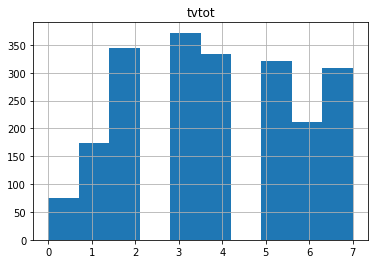

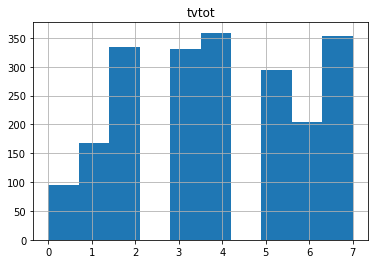

In [196]:
#Plot happy variables for visual inspection per country and year
tv_total_complete.groupby('gndr').hist(sharey=True,sharex=True)

The distribution of total tv watching hours is non parametric as it can be appreciated when plotting the hours by gender for 2012.

In [197]:
#Build a new dataframe with the total tv hours per gender
tv_total_reordered = pd.DataFrame()

#Create lists splitting between men and women the total tv watching hours
men = list(tv_total_complete[tv_total_complete.gndr == 1.0]['tvtot'])
women = list(tv_total_complete[tv_total_complete.gndr == 2.0]['tvtot'])

#Build columns and add to the dataframe
tv_total_reordered['men'] = men
tv_total_reordered['women'] = women

In [198]:
# Kruskal-Wallace Test

# Join all ratings together into a list, then ranking them.
ranks = stats.rankdata(
    tv_total_reordered['men'].tolist() +
    tv_total_reordered['women'].tolist())

# Add the new ranked variables to the data frame.
tv_total_reordered['Ranks_men'] = ranks[0:2140]
tv_total_reordered['Ranks_women'] = ranks[2140:4280]


# Average rank per group.
groups = ['Ranks_men', 'Ranks_women']
print(tv_total_reordered[groups].apply(np.mean))

# Overall average rank.
print(np.mean(ranks))

# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
stats.kruskal(
    tv_total_reordered['men'],
    tv_total_reordered['women'])

Ranks_men      2126.00514
Ranks_women    2154.99486
dtype: float64
2140.5


KruskalResult(statistic=0.6014571876999385, pvalue=0.43802258247065096)

It appears that the groups do not differ significantly. The test says there is a 43.8% chance of getting our data if there were no systematic difference between in the total tv watching hours per gender in the population. Based on our data, tv watching hours doesn't seem to differ systematically across gender.

#### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone? ####

In [199]:
#Get info of the dataset once reduced to the trust variable
#Slice the dataframe to the people trust variable
pplfairness = raw_data[['partner','year','pplfair']]

#Info
pplfairness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 3 columns):
partner    8577 non-null float64
year       8594 non-null int64
pplfair    8555 non-null float64
dtypes: float64(2), int64(1)
memory usage: 201.5 KB


In [201]:
#Slice by the year 2012
pplfairness_2012 = pplfairness[pplfairness.year == 6]

#Drop year
pplfairness_2012bis = pplfairness_2012.drop('year',axis = 1)

#Get information of the new dataframe
pplfairness_2012bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4297 entries, 0 to 7685
Data columns (total 2 columns):
partner    4290 non-null float64
pplfair    4277 non-null float64
dtypes: float64(2)
memory usage: 100.7 KB


In [202]:
#Clean the values in the dataframe that are null (partner)
pplfairness_2012bis_partner_cl = pplfairness_2012bis[pplfairness_2012bis.partner.notnull()]

#Clean the values in the dataframe that are null (total hours)
pplfairness_cle = pplfairness_2012bis_partner_cl[pplfairness_2012bis_partner_cl.pplfair.notnull()]

#Reset index
pplfairness_clea = pplfairness_cle.reset_index()

#Drop old index
pplfairness_clean = pplfairness_clea.drop('index',axis = 1)

#Check Values
pplfairness_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 2 columns):
partner    4271 non-null float64
pplfair    4271 non-null float64
dtypes: float64(2)
memory usage: 66.8 KB


In [204]:
#Downsample majority class (due to computational restrictions we downsample the majority instead of upsampling the minority)

# Separate majority and minority classes
pplfairness_clean_majority = pplfairness_clean[pplfairness_clean.partner == 1.0]
pplfairness_clean_minority = pplfairness_clean[pplfairness_clean.partner == 2.0]
 
# Downsample the majority
pplfairness_clean_majority_downsampled = resample(pplfairness_clean_majority, replace=False, n_samples=1608, random_state=123) 
 
# Combine minority class with downsampled majority class
pplfairness_complete = pd.concat([pplfairness_clean_majority_downsampled, pplfairness_clean_minority])

# Display new class counts
pplfairness_complete.partner.value_counts()

2.0    1608
1.0    1608
Name: partner, dtype: int64

partner
1.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2.0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

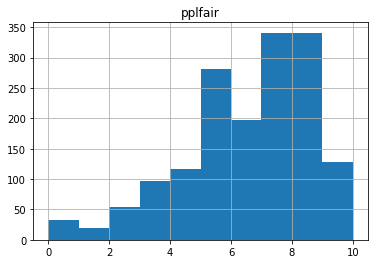

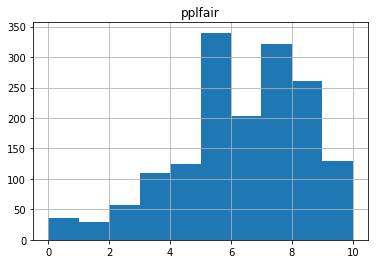

In [205]:
#Plot happy variables for visual inspection per country and year
pplfairness_complete.groupby('partner').hist(sharey=True,sharex=True)

Distributions are considered to be normal although skewed to the left

In [207]:
#Build a new dataframe with the total tv hours per gender
pplfairness_reordered = pd.DataFrame()

#Create lists splitting between men and women the total tv watching hours
wpartner = list(pplfairness_complete[pplfairness_complete.partner == 1.0]['pplfair'])
alone = list(pplfairness_complete[pplfairness_complete.partner == 2.0]['pplfair'])

#Build columns and add to the dataframe
pplfairness_reordered['wpartner'] = wpartner
pplfairness_reordered['alone'] = alone

wpartner    6.085821
alone       5.856965
dtype: float64


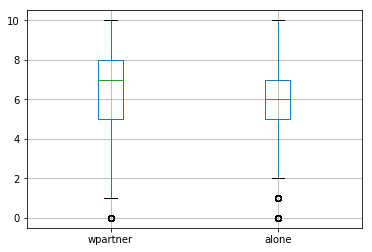

9.126537190662138
0.002539122042052086


In [208]:
# Printing the means for each group.
print(pplfairness_reordered.mean())

pplfairness_reordered.boxplot()
plt.show()


F, p = stats.f_oneway(
    pplfairness_reordered['wpartner'],
    pplfairness_reordered['alone'])

# The F statistic.
print(F)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(p)

In [210]:
#Run a one way ANOVA test on the groups
print(stats.ttest_ind(pplfairness_reordered['wpartner'], pplfairness_reordered['alone']))

Ttest_indResult(statistic=3.021015920292726, pvalue=0.0025391220420555288)


It appears that the two groups of people (in 2012) living with a partner or alone are likely to differ in the population (p < .005).  Visual inspection suggests that the people living alone believe that people are not fair compared to the ones living with their partner. To test whether the people living alone is the odd one out, we compare each group to each other. 

The results of this test are interesting! Contrary to what we might have expected from a visual inspection of the histograms, the means of all three groups seem to be significantly different from one another. Wood is highest, then Steel, then Plastic.

In [211]:
#Tukey HSD test

#Build the arrays for comparison
fair = np.asarray(wpartner + alone)

group_fair = np.array(['wpartner', 'alone'])

group_fair = np.repeat(group_fair, len(fair)/2)

#Run the pairwise t-test using tukey hsd
tukey = pairwise_tukeyhsd(endog=fair,    # Data
                          groups=group_fair,   # Groups
                          alpha=0.05)     # Significance level

#Summarize the data
tukey.summary()

group1,group2,meandiff,lower,upper,reject
alone,wpartner,0.2289,0.0803,0.3774,True


In the Tukey HSD test the null hypothesis is that all means being compared are from the same population.

This test confirms the result obtained by the one way ANOVA test. In this case the rejection of the null hypothesis is true being the means significantly different and therefore having populations that are belive that others are more unfair if they live alone than when they live with their partners.

#### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out? ####

In [213]:
#Get info of the dataset once reduced to the trust variable
#Slice the dataframe to the people trust variable
meet = raw_data[['cntry','year','sclmeet']]

#Info
meet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 3 columns):
cntry      8594 non-null object
year       8594 non-null int64
sclmeet    8579 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 201.5+ KB


In [214]:
#Slice by the year 2014
meet_2014 = meet[meet.year == 7]

#Drop year
meet_2014bis = meet_2014.drop('year',axis = 1)

#Get information of the new dataframe
meet_2014bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4297 entries, 773 to 8593
Data columns (total 2 columns):
cntry      4297 non-null object
sclmeet    4291 non-null float64
dtypes: float64(1), object(1)
memory usage: 100.7+ KB


In [215]:
#Clean the values in the dataframe that are null (country)
meet_2014bis_cntr_cl = meet_2014bis[meet_2014bis.cntry.notnull()]

#Clean the values in the dataframe that are null (social meet)
meet_cle = meet_2014bis_cntr_cl[meet_2014bis_cntr_cl.sclmeet.notnull()]

#Reset index
meet_clea = meet_cle.reset_index()

#Drop old index
meet_clean = meet_clea.drop('index',axis = 1)

#Check Values
meet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4291 entries, 0 to 4290
Data columns (total 2 columns):
cntry      4291 non-null object
sclmeet    4291 non-null float64
dtypes: float64(1), object(1)
memory usage: 67.1+ KB


In [222]:
#SLice the dataframe for three countries
meet_final = meet_clean.loc[meet_clean['cntry'].isin(['ES','SE','CH'])]

ES    1211
SE     908
CH     772
Name: cntry, dtype: int64

cntry
CH    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
ES    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
SE    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

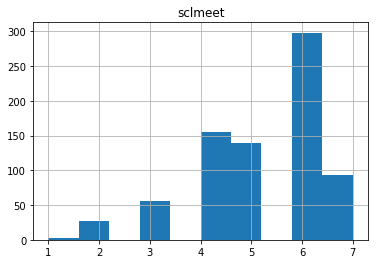

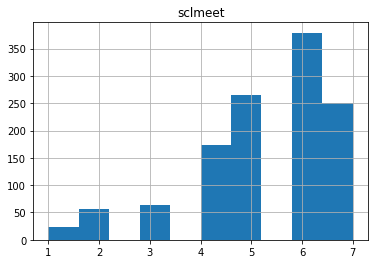

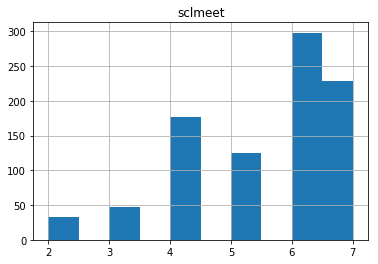

In [223]:
#Plot happy variables for visual inspection per country and year
meet_final.groupby('cntry').hist(sharey=True,sharex=True)

In [247]:
#Downsample majority class (due to computational restrictions we downsample the majority instead of upsampling the minority)

# Separate majority and minority classes
meet_final_majority_1 = meet_final[meet_final.cntry == 'ES']
meet_final_majority_2 = meet_final[meet_final.cntry == 'SE']
meet_final_minority = meet_final[meet_final.cntry == 'CH']
 
# Downsample the majority
meet_final_majority_1_downsampled = resample(meet_final_majority_1, replace=False, n_samples=772, random_state=123) 
meet_final_majority_2_downsampled = resample(meet_final_majority_2, replace=False, n_samples=772, random_state=123)  

# Combine minority class with downsampled majority class
meet_complete = pd.concat([meet_final_majority_1_downsampled, meet_final_majority_2_downsampled, meet_final_minority])

# Display new class counts
meet_complete.cntry.value_counts()

SE    772
ES    772
CH    772
Name: cntry, dtype: int64

In [248]:
#Build a new dataframe with the total tv hours per gender
meet_reordered = pd.DataFrame()

#Create lists splitting between countries
ES = list(meet_complete[meet_complete.cntry == 'ES']['sclmeet'])
SE = list(meet_complete[meet_complete.cntry == 'SE']['sclmeet'])
CH = list(meet_complete[meet_complete.cntry == 'CH']['sclmeet'])

#Build columns and add to the dataframe
meet_reordered['SE'] = SE
meet_reordered['ES'] = ES
meet_reordered['CH'] = CH

In [249]:
# Kruskal-Wallace Test

# Join all ratings together into a list, then ranking them.
ranks = stats.rankdata(
    meet_reordered['ES'].tolist() +
    meet_reordered['SE'].tolist() + 
    meet_reordered['CH'].tolist())

# Add the new ranked variables to the data frame.
meet_reordered['Ranks_ES'] = ranks[0:772]
meet_reordered['Ranks_SE'] = ranks[772:1544]
meet_reordered['Ranks_CH'] = ranks[1544:2316]


# Average rank per group.
groups = ['Ranks_ES', 'Ranks_SE', 'Ranks_CH']
print(meet_reordered[groups].apply(np.mean))

# Overall average rank.
print(np.mean(ranks))

# Print the test statistic followed by the probability of getting this result
# if the groups were not different.
stats.kruskal(
    meet_reordered['ES'],
    meet_reordered['SE'],
    meet_reordered['CH'])

Ranks_ES    1160.752591
Ranks_SE    1234.441710
Ranks_CH    1080.305699
dtype: float64
1158.5


KruskalResult(statistic=21.838360207302635, pvalue=1.8107576725725307e-05)

It appears that the groups do differ significantly. The test says there is a less than 0.05% chance of getting our data if there were no systematic difference between in the social meetings between countries. Based on our data, social meeting seem to differ systematically across countries.

Based on the differences it seems that ***Sweden*** stands out having more socal hours than the rest, followed by Spain and Switzerland in the third place

#### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others of their age, in 2014. Are there differences, and if so, which countries stand out? ####

In [231]:
#Get info of the dataset once reduced to the trust variable
#Slice the dataframe to the people trust variable
social = raw_data[['cntry','year', 'agea', 'sclact']]

#Info
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 4 columns):
cntry     8594 non-null object
year      8594 non-null int64
agea      8355 non-null float64
sclact    8500 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 268.6+ KB


In [232]:
#Slice by the year 2014
social_2014 = social[social.year == 7]

#Drop year
social_2014bis = social_2014.drop('year',axis = 1)

#Get information of the new dataframe
social_2014bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4297 entries, 773 to 8593
Data columns (total 3 columns):
cntry     4297 non-null object
agea      4184 non-null float64
sclact    4249 non-null float64
dtypes: float64(2), object(1)
memory usage: 134.3+ KB


In [237]:
#Clean the values in the dataframe that are null (country)
social_2014bis_cntr_cl = social_2014bis[meet_2014bis.cntry.notnull()]

#Clean the values in the dataframe that are null (social activities)
social_cle = social_2014bis_cntr_cl[social_2014bis_cntr_cl.sclact.notnull()]

#Reset index
social_clea = social_cle.reset_index()

#Drop old index
social_clean = social_clea.drop('index',axis = 1)

#Check Values
social_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4249 entries, 0 to 4248
Data columns (total 3 columns):
cntry     4249 non-null object
agea      4137 non-null float64
sclact    4249 non-null float64
dtypes: float64(2), object(1)
memory usage: 99.7+ KB


In [264]:
#SLice the dataframe for three countries
social_complete = social_clean.loc[social_clean['cntry'].isin(['ES','SE','CH'])]

#Count values per country
social_complete.cntry.value_counts()

ES    1185
SE     904
CH     765
Name: cntry, dtype: int64

cntry
CH    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
ES    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
SE    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

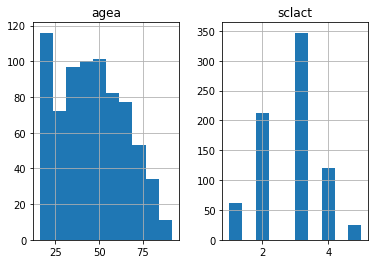

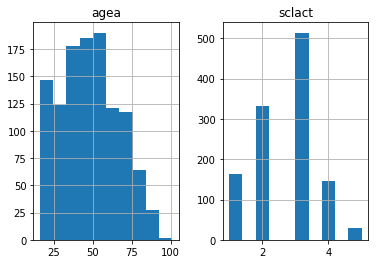

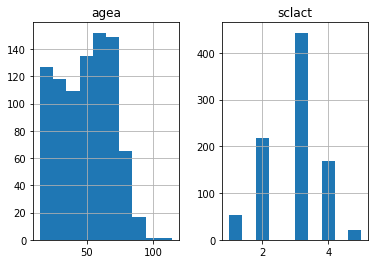

In [265]:
#Plot happy variables for visual inspection per country and year
social_complete.groupby('cntry').hist(sharey=False,sharex=False)

In [266]:
#Create lists gourping by age interval and country Spain: <20, between 20 and 40, between 40 and 60, more than 60
ES_1 = list(social_complete[(social_complete.cntry == 'ES') & (social_complete.agea <= 20)]['sclact'])
ES_2 = list(social_complete[(social_complete.cntry == 'ES') & (social_complete.agea > 20)& (social_complete.agea <= 40)]['sclact'])
ES_3 = list(social_complete[(social_complete.cntry == 'ES') & (social_complete.agea > 40)& (social_complete.agea <= 60)]['sclact'])
ES_4 = list(social_complete[(social_complete.cntry == 'ES') & (social_complete.agea > 60) ]['sclact'])

#Create lists gourping by age interval and country Sweden: <20, between 20 and 40, between 40 and 60, more than 60
SE_1 = list(social_complete[(social_complete.cntry == 'SE') & (social_complete.agea <= 20)]['sclact'])
SE_2 = list(social_complete[(social_complete.cntry == 'SE') & (social_complete.agea > 20)& (social_complete.agea <= 40)]['sclact'])
SE_3 = list(social_complete[(social_complete.cntry == 'SE') & (social_complete.agea > 40)& (social_complete.agea <= 60)]['sclact'])
SE_4 = list(social_complete[(social_complete.cntry == 'SE') & (social_complete.agea > 60) ]['sclact'])

#Create lists gourping by age interval and country Switzerland: <20, between 20 and 40, between 40 and 60, more than 60
CH_1 = list(social_complete[(social_complete.cntry == 'CH') & (social_complete.agea <= 20)]['sclact'])
CH_2 = list(social_complete[(social_complete.cntry == 'CH') & (social_complete.agea > 20)& (social_complete.agea <= 40)]['sclact'])
CH_3 = list(social_complete[(social_complete.cntry == 'CH') & (social_complete.agea > 40)& (social_complete.agea <= 60)]['sclact'])
CH_4 = list(social_complete[(social_complete.cntry == 'CH') & (social_complete.agea > 60) ]['sclact'])

In [267]:
#Tukey hsd
#Build the arrays for comparison
social= np.asarray(ES_1 + ES_2 + ES_3 + ES_4 +
                   SE_1 + SE_2 + SE_3 + SE_4 +
                   CH_1 + CH_2 + CH_3 + CH_4)

group_social = np.array(['ES_1', 'ES_2', 'ES_3', 'ES_4',
                   'SE_1', 'SE_2', 'SE_3', 'SE_4',
                   'CH_1', 'CH_2', 'CH_3', 'CH_4'])

group_social = np.repeat(group_social, len(social)/12)

#Run the pairwise t-test using tukey hsd
tukey = pairwise_tukeyhsd(endog=social,    # Data
                          groups=group_social,   # Groups
                          alpha=0.05)     # Significance level

#Summarize the data
tukey.summary()

group1,group2,meandiff,lower,upper,reject
CH_1,CH_2,-0.1472,-0.4237,0.1294,False
CH_1,CH_3,-0.1385,-0.4151,0.138,False
CH_1,CH_4,-0.1732,-0.4497,0.1034,False
CH_1,ES_1,-0.2554,-0.532,0.0211,False
CH_1,ES_2,-0.2511,-0.5276,0.0255,False
CH_1,ES_3,-0.2771,-0.5536,-0.0005,True
CH_1,ES_4,-0.2078,-0.4844,0.0688,False
CH_1,SE_1,-0.5844,-0.861,-0.3079,True
CH_1,SE_2,-0.0043,-0.2809,0.2722,False
CH_1,SE_3,-0.1558,-0.4324,0.1207,False


The population has been grouped in four age intervals:

1. lower than 20,
2. Between 20 and 40,
3. Between 40 and 60,
4. More than 60

In this case we have run all the comparisons between age intervales and countries. In the Tukey HSD test the null hypothesis is that all means being compared are from the same population.

Only in the cases of ***Sweden*** the rejection of the null hypothesis is true being the means between different age intervals significantly different and therefore having populations that have different participation in social activities in 2014. In this case, the participation between SE_1 and SE_2, SE_3 and SE_4 are different. In all cases is SE_1 (population under 20) the one that has a higher participation in social activities.

The rest of the differences appear between countries and different ages (as the case of ***Sweden*** and ***Spain***) or between population in the same interval as in the case of ***Switzerland*** and ***Sweden*** (population under 20) being the participation of CH_1 lower.